Data Preparation:

Obtain a dataset containing credit-related features and labels (e.g., whether a credit applicant is high risk or low risk).

Homomorphic Encryption:
Choose a suitable homomorphic encryption library. PySEAL is a popular choice for implementing homomorphic encryption in Python.

Autoencoder Design:
Design an autoencoder architecture for feature extraction. The autoencoder should take in encrypted credit-related features and produce an encoded representation.
You may need to design the autoencoder layers based on the specific features in your dataset.

Training:
Train the homomorphic autoencoder using encrypted credit data.
Ensure that the training process is privacy-preserving and that the model doesn't learn any sensitive information.

Credit Risk Identification:
Use the encoded representation of the data from the autoencoder to perform credit risk identification or classification.
This step typically involves training a classifier (e.g., logistic regression, neural network) on the encoded data to predict credit risk.

Decryption:
If necessary, you can decrypt the final classification results to obtain the credit risk labels while maintaining privacy.

Evaluation:
Evaluate the performance of your credit risk identification system using appropriate metrics (e.g., accuracy, precision, recall).

Privacy and Security Considerations:

Ensure that your homomorphic encryption setup is secure and follows best practices for preserving privacy.
Address any legal and compliance requirements related to handling sensitive financial data.

In [948]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, LeakyReLU, Dropout
from keras.optimizers.legacy import Adam
from keras.layers import Input
from keras.models import Model

from sklearn import preprocessing
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
from sklearn.preprocessing import KBinsDiscretizer

# Create a label encoder
lb_encoder = LabelEncoder()

# Load the German credit card data
names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

data_original = pd.read_csv(r'D:\AI-ML Bits Course\Capstone Project\statlog+german+credit+data\german.data', names = names, delimiter=' ')

In [949]:
data = data_original.copy()
num_col = ["duration","creditamount", "installmentrate", "residencesince", "age","existingcredits","peopleliable"]
cat_col = ['existingchecking', 'credithistory', 'purpose', 'savings', 'employmentsince', 'statussex', 'otherdebtors', 
          'property', 'otherinstallmentplans', 'housing',  'job', 'telephone', 'foreignworker', 'classification']
edge_col = []

for col in num_col:    
    est = KBinsDiscretizer(n_bins=4, encode='ordinal', 
                       strategy='uniform')
    data[col] = est.fit_transform(data[[col]])
    for i, edges in enumerate(est.bin_edges_):
        edge_col.append(edges)
        

for item in data.columns:
    if item not in num_col:
        print(item)
        data[item] = lb_encoder.fit_transform(data[item])   

existingchecking
credithistory
purpose
savings
employmentsince
statussex
otherdebtors
property
otherinstallmentplans
housing
job
telephone
foreignworker
classification


In [950]:
def encryptedHotColName(input_df):
    namesList = []
    for col in input_df.columns:
        uniqValCount = len(input_df[col].unique())
        
        for cnt in range(uniqValCount):
            namesList.append(col+"_"+str(cnt))
    return namesList

# APPROACH 1 - Simple Encoder without Encryption

In [951]:
data.head()

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,0,0.0,4,4,0.0,4,4,3.0,2,0,...,0,3.0,2,1,1.0,2,0.0,1,0,0
1,1,2.0,2,4,1.0,0,2,1.0,1,0,...,0,0.0,2,1,0.0,2,0.0,0,0,1
2,3,0.0,4,7,0.0,0,3,1.0,2,0,...,0,2.0,2,1,0.0,1,3.0,0,0,0
3,0,2.0,2,3,1.0,0,3,1.0,2,2,...,1,1.0,2,2,0.0,2,3.0,0,0,0
4,0,1.0,3,0,1.0,0,2,2.0,2,0,...,3,2.0,2,2,1.0,2,3.0,0,0,1


In [952]:
data
X = data[['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']]
Y = data["classification"]

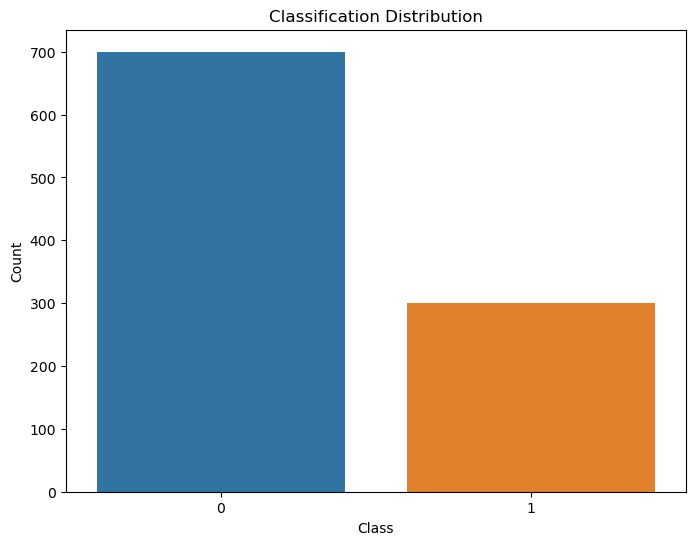

In [953]:
# Assuming `y` is your target variable
class_counts = Y.value_counts()

pt.figure(figsize=(8, 6))
sbn.barplot(x=class_counts.index, y=class_counts.values)
pt.title('Classification Distribution')
pt.xlabel('Class')
pt.ylabel('Count')
pt.show()

We have a 70-30 distribution of the output class.

In [954]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

# Create the encoder
encoder = Sequential()
encoder.add(Dense(128, activation="relu"))
encoder.add(Dense(64, activation="relu"))
encoder.add(Dense(32, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(8, activation="relu"))
encoder.add(Dense(1, activation="sigmoid"))

# Compile the encoder
encoder.compile(optimizer="adam", loss="binary_crossentropy")

# Train the encoder
encoder.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.5851
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5282
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5105
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.4803
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4710
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4538
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4340
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.4367
Epoch 9/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4101
Epoch 10/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4160
Epoch 11/100
25/25 [==============================] - 0s 5ms/step - loss: 0.4101
Epoch 12/100
25/25 [==============================] - 0s 5ms/step - loss: 0.3743
Epoch 13/100
25/25 [=================

In [955]:
encoder.summary()

Model: "sequential_102"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_477 (Dense)           (32, 128)                 2688      
                                                                 
 dense_478 (Dense)           (32, 64)                  8256      
                                                                 
 dense_479 (Dense)           (32, 32)                  2080      
                                                                 
 dense_480 (Dense)           (32, 16)                  528       
                                                                 
 dense_481 (Dense)           (32, 8)                   136       
                                                                 
 dense_482 (Dense)           (32, 1)                   9         
                                                                 
Total params: 13697 (53.50 KB)
Trainable params: 136

In [956]:
# Calculate the accuracy of the encoder on the test data
y_pred = (encoder.predict_on_batch(X_test) >= 0.5).astype(int)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

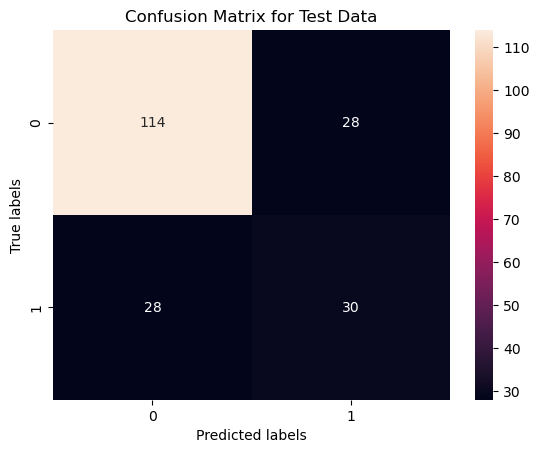

In [957]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as pt
import seaborn as sbn

con_mat = confusion_matrix(y_test, y_pred)
ax= pt.subplot()
sbn.heatmap(con_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Data')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [958]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       142
           1       0.52      0.52      0.52        58

    accuracy                           0.72       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.72      0.72      0.72       200



# ML Implementation with Keras and Torch post deterministic encryption

In [959]:
import torch, os
import tenseal as ts
import torch.nn as nn
import torch.optim as optim

In [990]:
#salt = os.urandom(16)
salt = b'\xeb\xd0\xd7W\xe8\x15w7\xcf0\x1f]\xe2x\xcd\xc8'
from cryptography.hazmat.backends import default_backend
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes
from cryptography.hazmat.primitives import hashes
from cryptography.hazmat.primitives.kdf.pbkdf2 import PBKDF2HMAC
from base64 import urlsafe_b64encode, urlsafe_b64decode

def encrypt_deterministic(key, plaintext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    encryptor = cipher.encryptor()
    data_to_encrypt = str(plaintext).encode()
    padded_plaintext = data_to_encrypt.ljust(16) # Pad to block size (16 bytes for AES)
    ciphertext = encryptor.update(padded_plaintext) + encryptor.finalize()
    return urlsafe_b64encode(ciphertext)

def decrypt_deterministic(key, ciphertext):
    cipher = Cipher(algorithms.AES(key), modes.ECB(), backend=default_backend())
    decryptor = cipher.decryptor()
    decrypted = decryptor.update(urlsafe_b64decode(ciphertext)) + decryptor.finalize()
    return decrypted.rstrip(b'\0') # Remove padding

# Generate a proper AES key using PBKDF2
password = b'password'
salt = salt
kdf = PBKDF2HMAC(
algorithm=hashes.SHA256(),
iterations=100000,
salt=salt,
    length=32, # Key size for AES-256
    backend=default_backend()
    )
key = kdf.derive(password)

In [961]:
#batch the data
batch_size = 50
num_batches = len(data) // batch_size

In [991]:
X = data[['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']]
Y = data["classification"]
X_encrypted_hot_colNames = encryptedHotColName(X)
encrypted_df = X.apply(lambda x: x.apply(lambda y: encrypt_deterministic(key, y)))
X_hot = pd.get_dummies(encrypted_df, columns=encrypted_df.columns)
encrypted_df_hot = X_hot.copy()
encrypted_df_hot["classification"] = Y
       
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_hot,Y, test_size=0.2)

In [963]:
salt

b'\xeb\xd0\xd7W\xe8\x15w7\xcf0\x1f]\xe2x\xcd\xc8'

In [964]:
#batch the data
batch_size = 50
num_batches = len(encrypted_df_hot) / batch_size
encrypted_batches = [encrypted_df_hot[i:i + batch_size] for i in range(0,len(encrypted_df_hot), batch_size)]
tot_columns = encrypted_df_hot.shape[1]
print(tot_columns)

81


In [965]:
X_hot

,existingchecking_b'6_Mkd_FCWTSgHTf53_5DAA==',existingchecking_b'9lkUwTD59I2O1ig_SrphWw==',existingchecking_b'NvO4X2fqjTYFMssGA8DugQ==',existingchecking_b'VHB_6t8igW6dwoPjHwx4mA==',duration_b'17M4Feukhk97tbpi-jcjUQ==',duration_b'WOvSNTXJMM_O-kKA8TnEjQ==',duration_b'eqKJ3uGq-9DMMH7Kfzzosw==',duration_b'p6323zbyw-ShcN_xCYfSYw==',credithistory_b'6_Mkd_FCWTSgHTf53_5DAA==',credithistory_b'9lkUwTD59I2O1ig_SrphWw==',...,job_b'6_Mkd_FCWTSgHTf53_5DAA==',job_b'9lkUwTD59I2O1ig_SrphWw==',job_b'NvO4X2fqjTYFMssGA8DugQ==',job_b'VHB_6t8igW6dwoPjHwx4mA==',peopleliable_b'17M4Feukhk97tbpi-jcjUQ==',peopleliable_b'WOvSNTXJMM_O-kKA8TnEjQ==',telephone_b'6_Mkd_FCWTSgHTf53_5DAA==',telephone_b'9lkUwTD59I2O1ig_SrphWw==',foreignworker_b'6_Mkd_FCWTSgHTf53_5DAA==',foreignworker_b'9lkUwTD59I2O1ig_SrphWw=='
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
996,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
997,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
998,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1


In [966]:
#Define Generator
def create_generator():
    generator = Sequential()
    generator.add(Dense(units=256, input_dim=encrypted_df_hot.shape[1]))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))
    
    generator.add(Dense(units=encrypted_df_hot.shape[1], activation='sigmoid'))
    
    generator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return generator

#Define discriminator
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units=256, input_dim=encrypted_df_hot.shape[1]))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))
    
    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(units=encrypted_df_hot.shape[1], activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))
    return discriminator

# create GAN
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape=(encrypted_df_hot.shape[1],))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss= 'binary_crossentropy', optimizer='adam', metrics='accuracy')
    gan.summary()
    return gan

#define GAN model
def train_gan(gan, generator, discriminator, epochs=1, batch_size=50):
    
    for e in range(epochs):
        print("In epoch :::::::::::::::::::::::::::::::::::::::::::::::::: ", e)
        i=0
        for batch in encrypted_batches:
            i = i +1
            print("In batch no :::::::::::::::::::::::::::::::::::::::::::::::::: ", i)
            noise = np.random.normal(0,1,[batch_size,tot_columns])
            generated_data = generator.predict(noise)
            
            real_data = batch
            #real_data = np.stack(real_data, axis=0)
            discriminator.trainable = True
            real_loss= discriminator.train_on_batch(real_data,np.ones((batch_size,tot_columns)))#Compute the discriminator's loss on real data
            fake_loss= discriminator.train_on_batch(generated_data,np.zeros((batch_size,tot_columns))) #Compute the discriminator's loss on fake data
            #print("real_loss : ", real_loss)
            #print("fake_loss : ", fake_loss)
            
            discriminator.trainable = False #Don't change discriminator weights
            loss, loss1 = gan.train_on_batch(noise, np.ones((batch_size,tot_columns)))
            #loss, accuracy = gan.train_on_batch(X_test, y_test)
            print(loss, loss1)

In [967]:
#create the models
generator = create_generator()
discriminator = create_discriminator()
#train GAN model
gan = create_gan(discriminator, generator)
train_gan(gan,generator, discriminator)

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 81)]              0         
                                                                 
 sequential_103 (Sequential  (None, 81)                760913    
 )                                                               
                                                                 
 sequential_104 (Sequential  (None, 81)                304721    
 )                                                               
                                                                 
Total params: 1065634 (4.07 MB)
Trainable params: 760913 (2.90 MB)
Non-trainable params: 304721 (1.16 MB)
_________________________________________________________________
In epoch ::::::::::::::::::::::::::::::::::::::::::::::::::  0
In batch no ::::::::::::::::::::::::::::::::::::::::::::::::::  1
2/2 [================

In [968]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the neural network
class BinaryClassifier(nn.Module):
    def __init__(self, in_columns):
        super(BinaryClassifier, self).__init__()
        '''self.layer1 = nn.Linear(in_columns, 256, bias=True)
        self.layer2 = nn.Linear(256, 1024, bias=True)
        self.layer3 = nn.Linear(1024, 512, bias=True)
        self.layer4 = nn.Linear(512, 256, bias=True)
        self.layer5 = nn.Linear(256, 1, bias=True)'''
        self.layer1 = nn.Linear(in_columns, 256, bias=True)
        self.layer2 = nn.Sequential(nn.Linear(256, 1024, bias=True), nn.Dropout(0.1))
        self.layer3 = nn.Sequential(nn.Linear(1024, 512, bias=True), nn.Dropout(0.1))
        self.layer4 = nn.Sequential(nn.Linear(512, 256, bias=True), nn.Dropout(0.1))
        self.layer5 = nn.Linear(256, 1, bias=True)
        

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = torch.sigmoid(self.layer5(x))
        return x

# Create an instance of the model
model = BinaryClassifier(X_train.shape[1])

# Define the loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)
#optimizer = optim.Adam(model.parameters(), lr=0.01)


# Training loop
epochs = 1000

for epoch in range(epochs):
    # Forward pass
    y_pred = model(torch.tensor(X_train.values, dtype=torch.float32))
    
    # Modify the target tensor
    y_train_tn = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

    # Calculate the loss
    loss = criterion(y_pred, y_train_tn)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Test the model
with torch.no_grad():
    y_pred = model(torch.tensor(X_test.values, dtype=torch.float32))
    y_pred_binary = (y_pred >= y_pred.mean()).int()

Epoch [100/1000], Loss: 0.6067749261856079
Epoch [200/1000], Loss: 0.5994808077812195
Epoch [300/1000], Loss: 0.5881799459457397
Epoch [400/1000], Loss: 0.553809642791748
Epoch [500/1000], Loss: 0.4942491948604584
Epoch [600/1000], Loss: 0.4576559066772461
Epoch [700/1000], Loss: 0.43177899718284607
Epoch [800/1000], Loss: 0.3991328179836273
Epoch [900/1000], Loss: 0.3529277741909027
Epoch [1000/1000], Loss: 0.3458562195301056


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

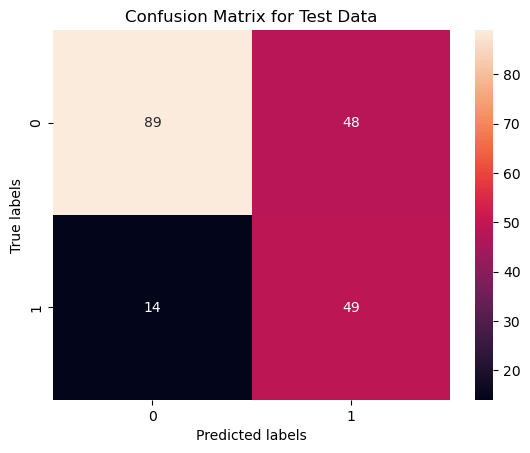

In [969]:
con_mat = confusion_matrix(y_test, y_pred_binary)
ax= pt.subplot()
sbn.heatmap(con_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Data')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [970]:
print(classification_report(y_test, y_pred_binary))

              precision    recall  f1-score   support

           0       0.86      0.65      0.74       137
           1       0.51      0.78      0.61        63

    accuracy                           0.69       200
   macro avg       0.68      0.71      0.68       200
weighted avg       0.75      0.69      0.70       200



In [971]:
torch

<module 'torch' from 'C:\\Users\\vikassoni\\anaconda3\\lib\\site-packages\\torch\\__init__.py'>

Epoch 1/100
25/25 [==============================] - 2s 2ms/step - loss: 0.6125
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5399
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4841
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4432
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4041
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3603
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2994
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2368
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1863
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.1224
Epoch 11/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0847
Epoch 12/100
25/25 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 13/100
25/25 [=================

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

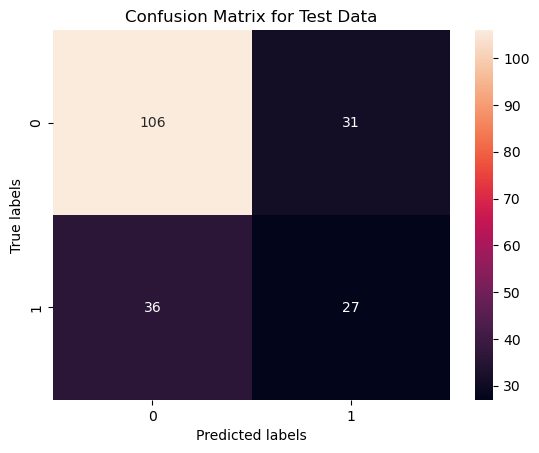

In [972]:
# Create the encoder
encoder = Sequential()
encoder.add(Dense(128, activation="relu"))
encoder.add(Dense(64, activation="relu"))
encoder.add(Dense(32, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(8, activation="relu"))
encoder.add(Dense(1, activation="sigmoid"))

# Compile the encoder
encoder.compile(optimizer="adam", loss="binary_crossentropy")

#X_tensor = X_train.applymap(tf.convert_to_tensor)
#Y_tensor = Y_train.applymap(tf.convert_to_tensor)

# Train the encoder
encoder.fit(X_train, y_train,epochs=100)
#encoder.fit(X_train, y_train,epochs=100)
# Calculate the accuracy of the encoder on the test data
y_pred = encoder.predict_on_batch(X_test)
# Calculate the accuracy of the encoder on the test data
y_pred = (encoder.predict_on_batch(X_test) >= 0.5).astype(int)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as pt
import seaborn as sbn

con_mat = confusion_matrix(y_test, y_pred)
ax= pt.subplot()
sbn.heatmap(con_mat, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for Test Data')
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])

In [973]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       137
           1       0.47      0.43      0.45        63

    accuracy                           0.67       200
   macro avg       0.61      0.60      0.60       200
weighted avg       0.66      0.67      0.66       200



In [974]:
num_col = ["duration","creditamount", "installmentrate", "residencesince", "age","existingcredits","peopleliable"]

In [975]:
test = np.array(edge_col)

In [976]:
edge_col

[array([ 4., 21., 38., 55., 72.]),
 array([  250. ,  4793.5,  9337. , 13880.5, 18424. ]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 array([19., 33., 47., 61., 75.]),
 array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 array([1.  , 1.25, 1.5 , 1.75, 2.  ])]

In [977]:
num_map = {}
index = 0
for col in num_col:
    num_map[col] = edge_col[index]
    index +=1

In [978]:
num_map

{'duration': array([ 4., 21., 38., 55., 72.]),
 'creditamount': array([  250. ,  4793.5,  9337. , 13880.5, 18424. ]),
 'installmentrate': array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 'residencesince': array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 'age': array([19., 33., 47., 61., 75.]),
 'existingcredits': array([1.  , 1.75, 2.5 , 3.25, 4.  ]),
 'peopleliable': array([1.  , 1.25, 1.5 , 1.75, 2.  ])}

In [979]:
Labelling_map = {}

for col in data.columns:
    Labelling_map[col] = {}
    if col not in num_col:
        for value in data_original[col].unique():
            index = (data_original[col]== value).idxmax()
            Labelling_map[col][value] = data[col].loc[index]

In [994]:
def mapMyData(input_df):
    names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount', 
         'savings', 'employmentsince', 'installmentrate', 'statussex', 'otherdebtors', 
         'residencesince', 'property', 'age', 'otherinstallmentplans', 'housing', 
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker']
    num_col = ["duration","creditamount", "installmentrate", "residencesince", "age","existingcredits","peopleliable"]
    encrypted_out_cols = ['existingchecking_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'existingchecking_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'existingchecking_b\'NvO4X2fqjTYFMssGA8DugQ==\'',
                           'existingchecking_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'duration_b\'17M4Feukhk97tbpi-jcjUQ==\'',
                           'duration_b\'WOvSNTXJMM_O-kKA8TnEjQ==\'',
                           'duration_b\'eqKJ3uGq-9DMMH7Kfzzosw==\'',
                           'duration_b\'p6323zbyw-ShcN_xCYfSYw==\'',
                           'credithistory_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'credithistory_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'credithistory_b\'FftjMn7cmspT3KJSXxaxCg==\'',
                           'credithistory_b\'NvO4X2fqjTYFMssGA8DugQ==\'',
                           'credithistory_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'purpose_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'purpose_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'purpose_b\'FftjMn7cmspT3KJSXxaxCg==\'',
                           'purpose_b\'LRmvjjySxGIdUNQp5kFfrQ==\'',
                           'purpose_b\'N_WIgEqCk2tNqkJQEkuCZw==\'',
                           'purpose_b\'NvO4X2fqjTYFMssGA8DugQ==\'',
                           'purpose_b\'TC1H5Yqehh8c1hxf2M_Vig==\'',
                           'purpose_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'purpose_b\'e-K1rKQ2D_0r5CMqbZJQ5A==\'',
                           'purpose_b\'eNA0TqTp0A0u6bW86x3osg==\'',
                           'creditamount_b\'17M4Feukhk97tbpi-jcjUQ==\'',
                           'creditamount_b\'WOvSNTXJMM_O-kKA8TnEjQ==\'',
                           'creditamount_b\'eqKJ3uGq-9DMMH7Kfzzosw==\'',
                           'creditamount_b\'p6323zbyw-ShcN_xCYfSYw==\'',
                           'savings_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'savings_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'savings_b\'FftjMn7cmspT3KJSXxaxCg==\'',
                           'savings_b\'NvO4X2fqjTYFMssGA8DugQ==\'',
                           'savings_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'employmentsince_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'employmentsince_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'employmentsince_b\'FftjMn7cmspT3KJSXxaxCg==\'',
                           'employmentsince_b\'NvO4X2fqjTYFMssGA8DugQ==\'',
                           'employmentsince_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'installmentrate_b\'17M4Feukhk97tbpi-jcjUQ==\'',
                           'installmentrate_b\'WOvSNTXJMM_O-kKA8TnEjQ==\'',
                           'installmentrate_b\'eqKJ3uGq-9DMMH7Kfzzosw==\'',
                           'installmentrate_b\'p6323zbyw-ShcN_xCYfSYw==\'',
                           'statussex_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'statussex_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'statussex_b\'NvO4X2fqjTYFMssGA8DugQ==\'',
                           'statussex_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'otherdebtors_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'otherdebtors_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'otherdebtors_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'residencesince_b\'17M4Feukhk97tbpi-jcjUQ==\'',
                           'residencesince_b\'WOvSNTXJMM_O-kKA8TnEjQ==\'',
                           'residencesince_b\'eqKJ3uGq-9DMMH7Kfzzosw==\'',
                           'residencesince_b\'p6323zbyw-ShcN_xCYfSYw==\'',
                           'property_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'property_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'property_b\'NvO4X2fqjTYFMssGA8DugQ==\'',
                           'property_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'age_b\'17M4Feukhk97tbpi-jcjUQ==\'', 'age_b\'WOvSNTXJMM_O-kKA8TnEjQ==\'',
                           'age_b\'eqKJ3uGq-9DMMH7Kfzzosw==\'', 'age_b\'p6323zbyw-ShcN_xCYfSYw==\'',
                           'otherinstallmentplans_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'otherinstallmentplans_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'otherinstallmentplans_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'housing_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'housing_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'housing_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'existingcredits_b\'17M4Feukhk97tbpi-jcjUQ==\'',
                           'existingcredits_b\'WOvSNTXJMM_O-kKA8TnEjQ==\'',
                           'existingcredits_b\'eqKJ3uGq-9DMMH7Kfzzosw==\'',
                           'existingcredits_b\'p6323zbyw-ShcN_xCYfSYw==\'',
                           'job_b\'6_Mkd_FCWTSgHTf53_5DAA==\'', 'job_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'job_b\'NvO4X2fqjTYFMssGA8DugQ==\'', 'job_b\'VHB_6t8igW6dwoPjHwx4mA==\'',
                           'peopleliable_b\'17M4Feukhk97tbpi-jcjUQ==\'',
                           'peopleliable_b\'WOvSNTXJMM_O-kKA8TnEjQ==\'',
                           'telephone_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'telephone_b\'9lkUwTD59I2O1ig_SrphWw==\'',
                           'foreignworker_b\'6_Mkd_FCWTSgHTf53_5DAA==\'',
                           'foreignworker_b\'9lkUwTD59I2O1ig_SrphWw==\'']
    output_df = pd.DataFrame(columns=names)
    if (type(input_df) != pd.DataFrame):
        raise ValueError ("Hey, Cannot find dataframe object")
    elif (len(input_df.columns) <20 or len(input_df.columns) >20):
        raise ValueError ("Hey, The data entered is incorrect. Please check all columns properly")
    for col in input_df.columns:
        if col not in names:
            raise ValueError ("Hey, Unidentified Colums in the input Data. Please correct data.")
    num_map = {'duration': [ 4., 21., 38., 55., 72.],
                 'creditamount': [  250. ,  4793.5,  9337. , 13880.5, 18424. ],
                 'installmentrate': [1.  , 1.75, 2.5 , 3.25, 4.  ],
                 'residencesince': [1.  , 1.75, 2.5 , 3.25, 4.  ],
                 'age': [19., 33., 47., 61., 75.],
                 'existingcredits': [1.  , 1.75, 2.5 , 3.25, 4.  ],
                 'peopleliable': [1.  , 1.25, 1.5 , 1.75, 2.  ]}
    Label_map = {'existingchecking': {'A11': 0, 'A12': 1, 'A14': 3, 'A13': 2},
                 'duration': {},
                 'credithistory': {'A34': 4, 'A32': 2, 'A33': 3, 'A30': 0, 'A31': 1},
                 'purpose': {'A43': 4,
                  'A46': 7,
                  'A42': 3,
                  'A40': 0,
                  'A41': 1,
                  'A49': 9,
                  'A44': 5,
                  'A45': 6,
                  'A410': 2,
                  'A48': 8},
                 'creditamount': {},
                 'savings': {'A65': 4, 'A61': 0, 'A63': 2, 'A64': 3, 'A62': 1},
                 'employmentsince': {'A75': 4, 'A73': 2, 'A74': 3, 'A71': 0, 'A72': 1},
                 'installmentrate': {},
                 'statussex': {'A93': 2, 'A92': 1, 'A91': 0, 'A94': 3},
                 'otherdebtors': {'A101': 0, 'A103': 2, 'A102': 1},
                 'residencesince': {},
                 'property': {'A121': 0, 'A122': 1, 'A124': 3, 'A123': 2},
                 'age': {},
                 'otherinstallmentplans': {'A143': 2, 'A141': 0, 'A142': 1},
                 'housing': {'A152': 1, 'A153': 2, 'A151': 0},
                 'existingcredits': {},
                 'job': {'A173': 2, 'A172': 1, 'A174': 3, 'A171': 0},
                 'peopleliable': {},
                 'telephone': {'A192': 1, 'A191': 0},
                 'foreignworker': {'A201': 0, 'A202': 1},
                 'classification': {1: 0, 2: 1}}
    #Iterate over input DataFrame
    for col in input_df.columns:
        
            if col in num_col:
                output_array = []
                for value in input_df[col]:
                    val_arr = num_map[col]
                    ret_val = 0.0
                    for pos in range(len(val_arr)):
                        if (value > val_arr[pos] and pos>0):
                            ret_val = float(pos)
                    output_array.append(ret_val)
                    #print(col, value, ret_val)
                output_df[col] = output_array
                
            else:
                output_array = []
                for value in input_df[col]:
                    #print(col, value, Label_map[col][value])
                    output_array.append(Label_map[col][value])
                output_df[col] = output_array
    
    encrypted_df = output_df.apply(lambda x: x.apply(lambda y: encrypt_deterministic(key, y)))
    output_df_hot = pd.get_dummies(encrypted_df, columns=encrypted_df.columns)
    encrypted_out_hot = pd.DataFrame(0,columns=encrypted_out_cols, index = range(input_df.shape[0]))
    for col in encrypted_out_hot.columns:
        if col in output_df_hot.columns:
            encrypted_out_hot[col]=output_df_hot[col]
            print("Hey", col)
    return encrypted_out_hot
    

In [995]:
small_df_enc = mapMyData(data_original.drop(['classification'], axis=1))

Hey existingchecking_b'6_Mkd_FCWTSgHTf53_5DAA=='
Hey existingchecking_b'9lkUwTD59I2O1ig_SrphWw=='
Hey existingchecking_b'NvO4X2fqjTYFMssGA8DugQ=='
Hey existingchecking_b'VHB_6t8igW6dwoPjHwx4mA=='
Hey duration_b'17M4Feukhk97tbpi-jcjUQ=='
Hey duration_b'WOvSNTXJMM_O-kKA8TnEjQ=='
Hey duration_b'eqKJ3uGq-9DMMH7Kfzzosw=='
Hey duration_b'p6323zbyw-ShcN_xCYfSYw=='
Hey credithistory_b'6_Mkd_FCWTSgHTf53_5DAA=='
Hey credithistory_b'9lkUwTD59I2O1ig_SrphWw=='
Hey credithistory_b'FftjMn7cmspT3KJSXxaxCg=='
Hey credithistory_b'NvO4X2fqjTYFMssGA8DugQ=='
Hey credithistory_b'VHB_6t8igW6dwoPjHwx4mA=='
Hey purpose_b'6_Mkd_FCWTSgHTf53_5DAA=='
Hey purpose_b'9lkUwTD59I2O1ig_SrphWw=='
Hey purpose_b'FftjMn7cmspT3KJSXxaxCg=='
Hey purpose_b'LRmvjjySxGIdUNQp5kFfrQ=='
Hey purpose_b'N_WIgEqCk2tNqkJQEkuCZw=='
Hey purpose_b'NvO4X2fqjTYFMssGA8DugQ=='
Hey purpose_b'TC1H5Yqehh8c1hxf2M_Vig=='
Hey purpose_b'VHB_6t8igW6dwoPjHwx4mA=='
Hey purpose_b'e-K1rKQ2D_0r5CMqbZJQ5A=='
Hey purpose_b'eNA0TqTp0A0u6bW86x3osg=='
Hey credit

In [996]:
small_df_enc

,existingchecking_b'6_Mkd_FCWTSgHTf53_5DAA==',existingchecking_b'9lkUwTD59I2O1ig_SrphWw==',existingchecking_b'NvO4X2fqjTYFMssGA8DugQ==',existingchecking_b'VHB_6t8igW6dwoPjHwx4mA==',duration_b'17M4Feukhk97tbpi-jcjUQ==',duration_b'WOvSNTXJMM_O-kKA8TnEjQ==',duration_b'eqKJ3uGq-9DMMH7Kfzzosw==',duration_b'p6323zbyw-ShcN_xCYfSYw==',credithistory_b'6_Mkd_FCWTSgHTf53_5DAA==',credithistory_b'9lkUwTD59I2O1ig_SrphWw==',...,job_b'6_Mkd_FCWTSgHTf53_5DAA==',job_b'9lkUwTD59I2O1ig_SrphWw==',job_b'NvO4X2fqjTYFMssGA8DugQ==',job_b'VHB_6t8igW6dwoPjHwx4mA==',peopleliable_b'17M4Feukhk97tbpi-jcjUQ==',peopleliable_b'WOvSNTXJMM_O-kKA8TnEjQ==',telephone_b'6_Mkd_FCWTSgHTf53_5DAA==',telephone_b'9lkUwTD59I2O1ig_SrphWw==',foreignworker_b'6_Mkd_FCWTSgHTf53_5DAA==',foreignworker_b'9lkUwTD59I2O1ig_SrphWw=='
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
996,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
997,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
998,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1


In [997]:
X_hot

,existingchecking_b'6_Mkd_FCWTSgHTf53_5DAA==',existingchecking_b'9lkUwTD59I2O1ig_SrphWw==',existingchecking_b'NvO4X2fqjTYFMssGA8DugQ==',existingchecking_b'VHB_6t8igW6dwoPjHwx4mA==',duration_b'17M4Feukhk97tbpi-jcjUQ==',duration_b'WOvSNTXJMM_O-kKA8TnEjQ==',duration_b'eqKJ3uGq-9DMMH7Kfzzosw==',duration_b'p6323zbyw-ShcN_xCYfSYw==',credithistory_b'6_Mkd_FCWTSgHTf53_5DAA==',credithistory_b'9lkUwTD59I2O1ig_SrphWw==',...,job_b'6_Mkd_FCWTSgHTf53_5DAA==',job_b'9lkUwTD59I2O1ig_SrphWw==',job_b'NvO4X2fqjTYFMssGA8DugQ==',job_b'VHB_6t8igW6dwoPjHwx4mA==',peopleliable_b'17M4Feukhk97tbpi-jcjUQ==',peopleliable_b'WOvSNTXJMM_O-kKA8TnEjQ==',telephone_b'6_Mkd_FCWTSgHTf53_5DAA==',telephone_b'9lkUwTD59I2O1ig_SrphWw==',foreignworker_b'6_Mkd_FCWTSgHTf53_5DAA==',foreignworker_b'9lkUwTD59I2O1ig_SrphWw=='
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,1,0,1
2,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,1
996,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
997,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,1
998,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,1


In [984]:
data_original

,existingchecking,duration,credithistory,purpose,creditamount,savings,employmentsince,installmentrate,statussex,otherdebtors,...,property,age,otherinstallmentplans,housing,existingcredits,job,peopleliable,telephone,foreignworker,classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2
